In [ ]:
import numpy as np
import tensorflow as tf
import chess
from chesslab.training_tf import load_model

In [2]:
def encode(board,encoding):
    b=str(board).replace(' ','').split('\n')
    a=np.zeros([8,8,len(encoding['.'])])
    for i,row in enumerate(b):
        for j,val in enumerate(row):
            a[i,j,:]=encoding[val]
    return a

In [3]:
class Model_2(tf.Module):

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,4,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        #self.trainable_variables = []
        #for i in range(len(self.hw)):
        #    self.trainable_variables.append(self.hw[i])    
        #    self.trainable_variables.append(self.hb[i])

    @tf.function(input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])
    def __call__(self,x): 
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 4])
        out = tf.nn.conv2d(out,self.hw[0], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[0])
        out = tf.nn.relu(out)
        out = tf.nn.conv2d(out,self.hw[1], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[1])
        out = tf.nn.relu(out)
        out = tf.nn.conv2d(out,self.hw[2], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[2])
        out = tf.nn.elu(out)
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[3])
        out = tf.add(out, self.hb[3])
        out = tf.nn.relu(out)
        out =  tf.matmul(out,self.hw[4])
        out = tf.add(out, self.hb[4])
        return out
model = Model_2()

In [4]:
path_model = './tmp/tf_weights-relu.0.1.h5'
encoding,history=load_model(model,path_model)

In [5]:
board = chess.Board()
code = encode(board,encoding)
code2 = np.tile(code,(20,1,1,1))
code3 = np.tile(code,(35,1,1,1))
code4 = np.tile(code,(100,1,1,1))
code5 = np.tile(code,(400,1,1,1))
code6 = np.tile(code,(1000,1,1,1))
code7 = np.tile(code,(1225,1,1,1))
code8 = np.tile(code,(8000,1,1,1))
code9 = np.tile(code,(10000,1,1,1))
code10 = np.tile(code,(20000,1,1,1))
print(code.shape)
print(code2.shape)

(8, 8, 4)
(20, 8, 8, 4)


In [6]:
model(code3)

<tf.Tensor: shape=(35, 2), dtype=float32, numpy=
array([[ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
       [ 0.6736216 , -0.96570086],
      

In [7]:
save_model_path = './tmp/saved_model/'
call_output = model.__call__.get_concrete_function(tf.TensorSpec(None, tf.float32))
tf.saved_model.save(model,save_model_path,signatures={'serving_default': call_output})

INFO:tensorflow:Assets written to: ./tmp/saved_model/assets


In [8]:
imported = tf.saved_model.load(save_model_path)

In [9]:
imported(code)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.6736219, -0.9657006]], dtype=float32)>

In [10]:
imported(code2)

<tf.Tensor: shape=(20, 2), dtype=float32, numpy=
array([[ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086],
       [ 0.67362154, -0.96570086]], dtype=float32)>

In [11]:
encoding

{'.': array([0., 0., 0., 0.], dtype=float32),
 'p': array([1., 0., 0., 0.], dtype=float32),
 'P': array([0., 0., 0., 1.], dtype=float32),
 'b': array([0., 1., 0., 0.], dtype=float32),
 'B': array([0., 0., 1., 0.], dtype=float32),
 'n': array([1., 1., 0., 0.], dtype=float32),
 'N': array([0., 0., 1., 1.], dtype=float32),
 'r': array([1., 0., 1., 0.], dtype=float32),
 'R': array([0., 1., 0., 1.], dtype=float32),
 'q': array([1., 0., 0., 1.], dtype=float32),
 'Q': array([0., 1., 1., 0.], dtype=float32),
 'k': array([1., 1., 1., 0.], dtype=float32),
 'K': array([0., 1., 1., 1.], dtype=float32)}

In [41]:
np.concatenate((code2,code3)).shape

(55, 8, 8, 3)

In [28]:
cuda = False
physical_devices = tf.config.list_physical_devices('GPU')
device = "/device:GPU:0" if cuda and len(physical_devices)>0 else "/cpu:0"

In [29]:
%%timeit
with tf.device(device):
    model(code)

5.6 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%%timeit
with tf.device(device):
    model(code2)

7.88 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
with tf.device(device):
    model(code3)

9.44 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
with tf.device(device):
    model(code4)

14.7 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit
with tf.device(device):
    model(code5)

43.2 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%%timeit
with tf.device(device):
    model(code6)

97.3 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
with tf.device(device):
    model(code7)

122 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
with tf.device(device):
    model(code8)

753 ms ± 8.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
with tf.device(device):
    model(code9)

945 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit
with tf.device(device):
    model(code10)

1.89 s ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
import numpy as np
import chess
board = chess.Board()

In [67]:
encoding={'.': np.array([0., 0., 0.]),
 'p': np.array([0., 0., 1.]),
 'P': np.array([ 0.,  0., -1.]),
 'b': np.array([0., 1., 0.]),
 'B': np.array([ 0., -1.,  0.]),
 'n': np.array([1., 0., 0.]),
 'N': np.array([-1.,  0.,  0.]),
 'r': np.array([0., 1., 1.]),
 'R': np.array([ 0., -1., -1.]),
 'q': np.array([1., 0., 1.]),
 'Q': np.array([-1.,  0., -1.]),
 'k': np.array([1., 1., 0.]),
 'K': np.array([-1., -1.,  0.])}


def encode(board,encoding):
    b=str(board).replace(' ','').split('\n')
    a=np.zeros([8,8,len(encoding['.'])])
    for i,row in enumerate(b):
        for j,val in enumerate(row):
            a[i,j,:]=encoding[val]
    return a

In [68]:
%%timeit
code = encode(board,encoding)

76.6 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
def prueba():
    code = encode(board,encoding)

In [11]:
import time
def timer(function):
    
    i = 10000
    elapsed = 0
    for _ in range(i):
        start = time.time()
        function()
        elapsed += time.time()-start
    elapsed/=i
    return elapsed

In [13]:
timer(prueba)*1e6

79.60002422332764

In [10]:
8e-5 - 80e-6

0.0

In [1]:
import re, sys, time
from itertools import count
from collections import namedtuple

###############################################################################
# Piece-Square tables. Tune these to change sunfish's behaviour
###############################################################################

piece = { 'P': 100, 'N': 280, 'B': 320, 'R': 479, 'Q': 929, 'K': 60000 }
pst = {
    'P': (   0,   0,   0,   0,   0,   0,   0,   0,
            78,  83,  86,  73, 102,  82,  85,  90,
             7,  29,  21,  44,  40,  31,  44,   7,
           -17,  16,  -2,  15,  14,   0,  15, -13,
           -26,   3,  10,   9,   6,   1,   0, -23,
           -22,   9,   5, -11, -10,  -2,   3, -19,
           -31,   8,  -7, -37, -36, -14,   3, -31,
             0,   0,   0,   0,   0,   0,   0,   0),
    'N': ( -66, -53, -75, -75, -10, -55, -58, -70,
            -3,  -6, 100, -36,   4,  62,  -4, -14,
            10,  67,   1,  74,  73,  27,  62,  -2,
            24,  24,  45,  37,  33,  41,  25,  17,
            -1,   5,  31,  21,  22,  35,   2,   0,
           -18,  10,  13,  22,  18,  15,  11, -14,
           -23, -15,   2,   0,   2,   0, -23, -20,
           -74, -23, -26, -24, -19, -35, -22, -69),
    'B': ( -59, -78, -82, -76, -23,-107, -37, -50,
           -11,  20,  35, -42, -39,  31,   2, -22,
            -9,  39, -32,  41,  52, -10,  28, -14,
            25,  17,  20,  34,  26,  25,  15,  10,
            13,  10,  17,  23,  17,  16,   0,   7,
            14,  25,  24,  15,   8,  25,  20,  15,
            19,  20,  11,   6,   7,   6,  20,  16,
            -7,   2, -15, -12, -14, -15, -10, -10),
    'R': (  35,  29,  33,   4,  37,  33,  56,  50,
            55,  29,  56,  67,  55,  62,  34,  60,
            19,  35,  28,  33,  45,  27,  25,  15,
             0,   5,  16,  13,  18,  -4,  -9,  -6,
           -28, -35, -16, -21, -13, -29, -46, -30,
           -42, -28, -42, -25, -25, -35, -26, -46,
           -53, -38, -31, -26, -29, -43, -44, -53,
           -30, -24, -18,   5,  -2, -18, -31, -32),
    'Q': (   6,   1,  -8,-104,  69,  24,  88,  26,
            14,  32,  60, -10,  20,  76,  57,  24,
            -2,  43,  32,  60,  72,  63,  43,   2,
             1, -16,  22,  17,  25,  20, -13,  -6,
           -14, -15,  -2,  -5,  -1, -10, -20, -22,
           -30,  -6, -13, -11, -16, -11, -16, -27,
           -36, -18,   0, -19, -15, -15, -21, -38,
           -39, -30, -31, -13, -31, -36, -34, -42),
    'K': (   4,  54,  47, -99, -99,  60,  83, -62,
           -32,  10,  55,  56,  56,  55,  10,   3,
           -62,  12, -57,  44, -67,  28,  37, -31,
           -55,  50,  11,  -4, -19,  13,   0, -49,
           -55, -43, -52, -28, -51, -47,  -8, -50,
           -47, -42, -43, -79, -64, -32, -29, -32,
            -4,   3, -14, -50, -57, -18,  13,   4,
            17,  30,  -3, -14,   6,  -1,  40,  18),
}
# Pad tables and join piece and pst dictionaries
for k, table in pst.items():
    padrow = lambda row: (0,) + tuple(x+piece[k] for x in row) + (0,)
    pst[k] = sum((padrow(table[i*8:i*8+8]) for i in range(8)), ())
    pst[k] = (0,)*20 + pst[k] + (0,)*20

###############################################################################
# Global constants
###############################################################################

# Our board is represented as a 120 character string. The padding allows for
# fast detection of moves that don't stay within the board.
A1, H1, A8, H8 = 91, 98, 21, 28
initial = (
    '         \n'  #   0 -  9
    '         \n'  #  10 - 19
    ' rnbqkbnr\n'  #  20 - 29
    ' pppppppp\n'  #  30 - 39
    ' ........\n'  #  40 - 49
    ' ........\n'  #  50 - 59
    ' ........\n'  #  60 - 69
    ' ........\n'  #  70 - 79
    ' PPPPPPPP\n'  #  80 - 89
    ' RNBQKBNR\n'  #  90 - 99
    '         \n'  # 100 -109
    '         \n'  # 110 -119
)

# Lists of possible moves for each piece type.
N, E, S, W = -10, 1, 10, -1
directions = {
    'P': (N, N+N, N+W, N+E),
    'N': (N+N+E, E+N+E, E+S+E, S+S+E, S+S+W, W+S+W, W+N+W, N+N+W),
    'B': (N+E, S+E, S+W, N+W),
    'R': (N, E, S, W),
    'Q': (N, E, S, W, N+E, S+E, S+W, N+W),
    'K': (N, E, S, W, N+E, S+E, S+W, N+W)
}

# Mate value must be greater than 8*queen + 2*(rook+knight+bishop)
# King value is set to twice this value such that if the opponent is
# 8 queens up, but we got the king, we still exceed MATE_VALUE.
# When a MATE is detected, we'll set the score to MATE_UPPER - plies to get there
# E.g. Mate in 3 will be MATE_UPPER - 6
MATE_LOWER = piece['K'] - 10*piece['Q']
MATE_UPPER = piece['K'] + 10*piece['Q']

# The table size is the maximum number of elements in the transposition table.
TABLE_SIZE = 1e7

# Constants for tuning search
QS_LIMIT = 219
EVAL_ROUGHNESS = 13
DRAW_TEST = True


###############################################################################
# Chess logic
###############################################################################

class Position(namedtuple('Position', 'board score wc bc ep kp')):
    """ A state of a chess game
    board -- a 120 char representation of the board
    score -- the board evaluation
    wc -- the castling rights, [west/queen side, east/king side]
    bc -- the opponent castling rights, [west/king side, east/queen side]
    ep - the en passant square
    kp - the king passant square
    """

    def gen_moves(self):
        # For each of our pieces, iterate through each possible 'ray' of moves,
        # as defined in the 'directions' map. The rays are broken e.g. by
        # captures or immediately in case of pieces such as knights.
        for i, p in enumerate(self.board):
            if not p.isupper(): continue
            for d in directions[p]:
                for j in count(i+d, d):
                    q = self.board[j]
                    # Stay inside the board, and off friendly pieces
                    if q.isspace() or q.isupper(): break
                    # Pawn move, double move and capture
                    if p == 'P' and d in (N, N+N) and q != '.': break
                    if p == 'P' and d == N+N and (i < A1+N or self.board[i+N] != '.'): break
                    if p == 'P' and d in (N+W, N+E) and q == '.' \
                            and j not in (self.ep, self.kp, self.kp-1, self.kp+1): break
                    # Move it
                    yield (i, j)
                    # Stop crawlers from sliding, and sliding after captures
                    if p in 'PNK' or q.islower(): break
                    # Castling, by sliding the rook next to the king
                    if i == A1 and self.board[j+E] == 'K' and self.wc[0]: yield (j+E, j+W)
                    if i == H1 and self.board[j+W] == 'K' and self.wc[1]: yield (j+W, j+E)

    def rotate(self):
        ''' Rotates the board, preserving enpassant '''
        return Position(
            self.board[::-1].swapcase(), -self.score, self.bc, self.wc,
            119-self.ep if self.ep else 0,
            119-self.kp if self.kp else 0)

    def nullmove(self):
        ''' Like rotate, but clears ep and kp '''
        return Position(
            self.board[::-1].swapcase(), -self.score,
            self.bc, self.wc, 0, 0)

    def move(self, move):
        i, j = move
        p, q = self.board[i], self.board[j]
        put = lambda board, i, p: board[:i] + p + board[i+1:]
        # Copy variables and reset ep and kp
        board = self.board
        wc, bc, ep, kp = self.wc, self.bc, 0, 0
        score = self.score + self.value(move)
        # Actual move
        board = put(board, j, board[i])
        board = put(board, i, '.')
        # Castling rights, we move the rook or capture the opponent's
        if i == A1: wc = (False, wc[1])
        if i == H1: wc = (wc[0], False)
        if j == A8: bc = (bc[0], False)
        if j == H8: bc = (False, bc[1])
        # Castling
        if p == 'K':
            wc = (False, False)
            if abs(j-i) == 2:
                kp = (i+j)//2
                board = put(board, A1 if j < i else H1, '.')
                board = put(board, kp, 'R')
        # Pawn promotion, double move and en passant capture
        if p == 'P':
            if A8 <= j <= H8:
                board = put(board, j, 'Q')
            if j - i == 2*N:
                ep = i + N
            if j == self.ep:
                board = put(board, j+S, '.')
        # We rotate the returned position, so it's ready for the next player
        return Position(board, score, wc, bc, ep, kp).rotate()

    def value(self, move):
        i, j = move
        p, q = self.board[i], self.board[j]
        # Actual move
        score = pst[p][j] - pst[p][i]
        # Capture
        if q.islower():
            score += pst[q.upper()][119-j]
        # Castling check detection
        if abs(j-self.kp) < 2:
            score += pst['K'][119-j]
        # Castling
        if p == 'K' and abs(i-j) == 2:
            score += pst['R'][(i+j)//2]
            score -= pst['R'][A1 if j < i else H1]
        # Special pawn stuff
        if p == 'P':
            if A8 <= j <= H8:
                score += pst['Q'][j] - pst['P'][j]
            if j == self.ep:
                score += pst['P'][119-(j+S)]
        return score

In [2]:
a = Position(initial, 0, (True,True), (True,True), 0, 0)

In [16]:
moves = a.gen_moves()

In [17]:
len(list(moves))

20

In [18]:
import chess
board = chess.Board()

In [33]:
print(bin(board.pawns))
print(bin(board.knights))

0b11111111000000000000000000000000000000001111111100000000
0b100001000000000000000000000000000000000000000000000000001000010


In [28]:
print(board.ep_square)

None


In [30]:
board._board_state()

In [40]:
print("{:064b}".format(board.pawns))
print("{:064b}".format(board.knights))
print("{:064b}".format(board.bishops))
print("{:064b}".format(board.rooks))
print("{:064b}".format(board.queens))
print("{:064b}".format(board.kings))
print("{:064b}".format(board.occupied_co[True]))
print("{:064b}".format(board.occupied_co[False]))

0000000011111111000000000000000000000000000000001111111100000000
0100001000000000000000000000000000000000000000000000000001000010
0010010000000000000000000000000000000000000000000000000000100100
1000000100000000000000000000000000000000000000000000000010000001
0000100000000000000000000000000000000000000000000000000000001000
0001000000000000000000000000000000000000000000000000000000010000
0000000000000000000000000000000000000000000000001111111111111111
1111111111111111000000000000000000000000000000000000000000000000


In [41]:
print("{:064b}".format(board.pawns & board.occupied_co[False]))

0000000011111111000000000000000000000000000000000000000000000000


In [51]:
b=str(board).replace(' ','').split('\n')
b

['rnbqkbnr',
 'pppppppp',
 '........',
 '........',
 '........',
 '........',
 'PPPPPPPP',
 'RNBQKBNR']

In [50]:
board.piece_at(0).symbol()

'R'

In [52]:
SQUARES = chess.SQUARES_180

In [63]:
SQUARES

[56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7]

In [5]:
def encode_2(board,encoding):
    builder = []
    a=np.zeros([64,len(encoding['.'])])
    for i,square in enumerate(SQUARES):
        piece = board.piece_at(square)
        if piece:
            a[i,:]=encoding[piece.symbol()]
    return a.reshape([8,8,3])

encoding={'.': np.array([0., 0., 0.]),
 'p': np.array([0., 0., 1.]),
 'P': np.array([ 0.,  0., -1.]),
 'b': np.array([0., 1., 0.]),
 'B': np.array([ 0., -1.,  0.]),
 'n': np.array([1., 0., 0.]),
 'N': np.array([-1.,  0.,  0.]),
 'r': np.array([0., 1., 1.]),
 'R': np.array([ 0., -1., -1.]),
 'q': np.array([1., 0., 1.]),
 'Q': np.array([-1.,  0., -1.]),
 'k': np.array([1., 1., 0.]),
 'K': np.array([-1., -1.,  0.])}

In [71]:
np.sum( encode(board,encoding) - encode_2(board,encoding))

0.0

In [6]:
%%timeit
code = encode_2(board,encoding)

NameError: name 'board' is not defined

In [76]:
piece = board.piece_type_at(0)
bin(piece)

'0b100'

In [77]:
bin(100)

'0b1100100'

In [4]:
import chess
from chesslab.utils import perft

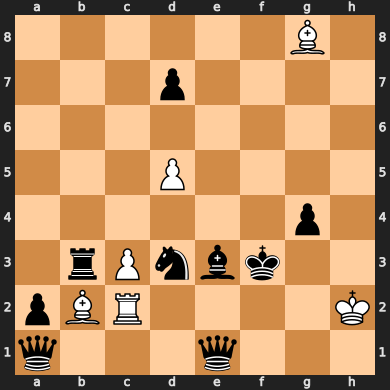

In [41]:
board = chess.Board("6B1/3p4/8/3P4/6p1/1rPnbk2/pBR4K/q3q3 b - - 3 63")
board

In [48]:
class obj:
    def __init__(self):
        self.mates=0

    def perft(self,board, depth):
        if depth == 0:
            if board.is_checkmate():
                self.mates+=1
            return 1
        n = 0
        moves = list(board.legal_moves)
        if len(moves)==0:
            if board.is_checkmate():
                self.mates+=1
                n+=1
        else:
            for m in moves:
                board.push(m)
                n+=self.perft(board,depth-1);
                board.pop()
        return n

In [58]:
o = obj()
o.perft(board,3)

19738

In [56]:
o.mates

1725

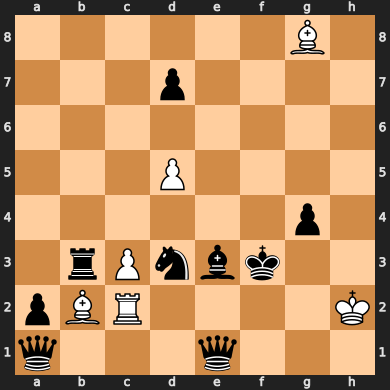

In [51]:
board

In [33]:
board.push_uci("e1h4")

Move.from_uci('e1h4')

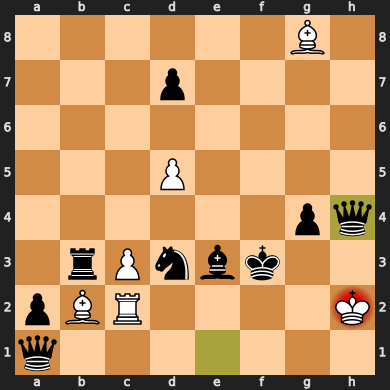

In [34]:
board

In [52]:
len(list(board.legal_moves))

46